In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

[]


In [2]:
from keras.models import Model
from keras.preprocessing import image
from keras.optimizers import SGD
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
import matplotlib.pyplot as plt
import numpy as np
import cv2

Using TensorFlow backend.


In [3]:
model = VGG19()
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy')

574717952/574710816 [==============================] - 15s 0us/step


In [4]:
!(wget http://www.confectionerycapers.com/images/up844a.jpg)

--2018-07-25 19:17:08--  http://www.confectionerycapers.com/images/up844a.jpg
Resolving www.confectionerycapers.com (www.confectionerycapers.com)... 202.72.184.28
Connecting to www.confectionerycapers.com (www.confectionerycapers.com)|202.72.184.28|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39687 (39K) [image/jpeg]
Saving to: ‘up844a.jpg’

up844a.jpg          100%[=====================>]  38.76K  52.1KB/s   in 0.7s   

2018-07-25 19:17:10 (52.1 KB/s) - ‘up844a.jpg’ saved [39687/39687]



In [5]:
im = cv2.resize(cv2.imread('up844a.jpg'), (224, 224))
im = np.expand_dims(im, axis=0)

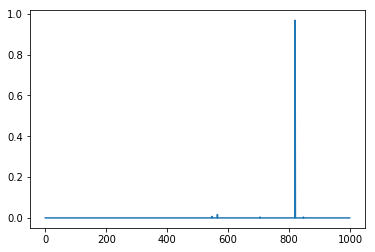

In [6]:
out = model.predict(im)
plt.plot(out.ravel())
plt.show()

In [18]:
import urllib.request, json 
with urllib.request.urlopen("https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json") as url:
    data = json.loads(url.read().decode())

In [21]:
data[str(np.argmax(out))][1]

'steam_locomotive'